# L2: Llama API Quickstart

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Load API keys and libraries

In [2]:
import os
from utils import get_llama_api_key, get_llama_base_url

llama_api_key = get_llama_api_key()
llama_base_url = get_llama_base_url()

from llama_api_client import LlamaAPIClient

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.</p>

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

## Llama API client Python library

In [3]:
def llama4(prompt, image_urls=[],
    model="Llama-4-Scout-17B-16E-Instruct-FP8"  # or Llama-4-Maverick-17B-128E-Instruct-FP8
):
  image_urls_content = []
  for url in image_urls:
    image_urls_content.append(
        {"type": "image_url", "image_url": {"url": url}})

  content = [{"type": "text", "text": prompt}]
  content.extend(image_urls_content)

  client = LlamaAPIClient(api_key=llama_api_key)

  response = client.chat.completions.create(
    model=model,
    messages=[{
        "role": "user",
        "content": content
    }],
    temperature=0
  )
  return response.completion_message.content.text

In [4]:
print(llama4("A brief history of AI in 3 short sentences."))

Here is a brief history of AI in 3 short sentences:

The term "Artificial Intelligence" was coined in 1956 by computer scientist John McCarthy, marking the beginning of AI as a field of research. The 1950s and 1960s saw the development of the first AI programs, including rule-based systems and neural networks, which aimed to mimic human intelligence. In the decades that followed, AI research ebbed and flowed, but recent advances in machine learning and deep learning have led to significant breakthroughs and applications in areas like computer vision, natural language processing, and robotics.


## Using OpenAI-compatible library

In [5]:
from openai import OpenAI

def llama4(prompt,
    image_urls=[],
    model="Llama-4-Scout-17B-16E-Instruct-FP8",  # or Llama-4-Maverick-17B-128E-Instruct-FP8
    debug=False
):
  image_urls_content = []
  for url in image_urls:
    image_urls_content.append(
        {"type": "image_url", "image_url": {"url": url}}) # TODO: for local image use {"url": "data:image/png;base64,..."}}

  content = [{"type": "text", "text": prompt}]
  content.extend(image_urls_content)

  client = OpenAI(api_key=llama_api_key, base_url=llama_base_url)

  response = client.chat.completions.create(
    model=model,
    messages=[{
        "role": "user",
        "content": content
    }],
    temperature=0
  )

  if debug:
    print(response)

  return response.choices[0].message.content

In [6]:
print(llama4("A brief history of AI in 3 short sentences."))

Here is a brief history of AI in 3 short sentences:

The term "Artificial Intelligence" was coined in 1956 by computer scientist John McCarthy, marking the beginning of AI as a field of research. The 1950s and 1960s saw the development of the first AI programs, including rule-based systems and neural networks, which aimed to mimic human intelligence. In the decades that followed, AI research ebbed and flowed, but recent advances in machine learning and deep learning have led to significant breakthroughs and applications in areas like computer vision, natural language processing, and robotics.


## Asking question about a single image

In [7]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def display_image(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

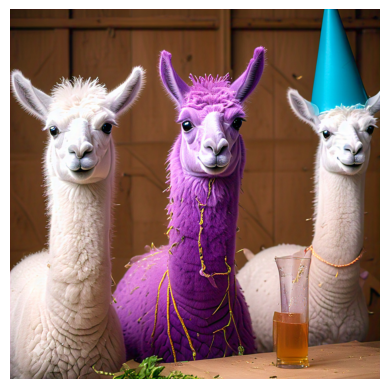

In [8]:
img_url = "https://raw.githubusercontent.com/meta-llama/llama-models/refs/heads/main/Llama_Repo.jpeg"
display_image(img_url)

In [9]:
print(llama4("What's in the image?", [img_url]))

The image depicts three llamas, each with distinct characteristics. The llama on the left is white and has a normal appearance. The middle llama is also white but has been digitally altered to have a purple hue and yellow string-like objects attached to its fur. The llama on the right is white, wearing a blue party hat and an orange beaded necklace.

In front of the llamas, there is a glass containing a brown liquid, possibly beer or another beverage. The background of the image features a wooden wall, which adds a rustic touch to the scene. Overall, the image presents a unique and playful depiction of llamas in a celebratory setting.


## Asking question about multiple images

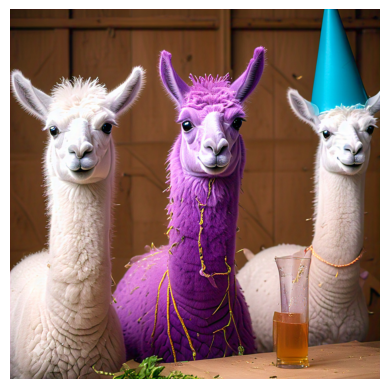

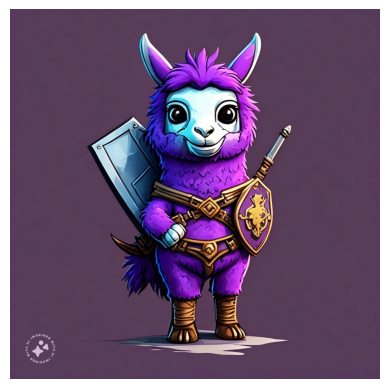

In [10]:
img_url2 = "https://raw.githubusercontent.com/meta-llama/PurpleLlama/refs/heads/main/logo.png"
display_image(img_url)
display_image(img_url2)

In [11]:
print(llama4("Compare these two images.", [img_url, img_url2]))

The two images depict llamas in different settings and styles. The first image shows three llamas, two white and one purple, sitting at a table with a glass of beer, while the second image features a single purple llama dressed as a warrior.

**Key Differences:**

* **Setting:** The first image is set in a rustic or rural environment, possibly a barn or stable, while the second image has a more fantastical or cartoonish background.
* **Style:** The first image appears to be a realistic depiction of llamas, while the second image is a stylized illustration with exaggerated features.
* **Color Scheme:** The first image features a muted color palette with shades of brown, white, and purple, while the second image has a bold and vibrant color scheme with purples, golds, and whites.
* **Composition:** The first image focuses on the interaction between the three llamas, while the second image centers around the solo llama warrior.

**Similarities:**

* **Subject Matter:** Both images feature

## Llama 4 Long Context

In [12]:
with open("A-tale-of-two-cities.txt", "r", encoding='utf=8') as file:
    tale = file.read()

In [13]:
question = """What's the last utterance Sydney Carton would have given
at the end of the book A Tale of Two Cities? Just give one.
What's the paragraph before the last utterance?
"""

In [ ]:
print(llama4(f"{question} The book content is below: {tale[300000:]}",
      model="Llama-4-Maverick-17B-128E-Instruct-FP8"))

## Llama 4 Multilingual Support

In [ ]:
question = """how many languages do you understand?
answer in all the languages you can speak."""

print(llama4(question))

In [ ]:
client = OpenAI(api_key=llama_api_key, base_url=llama_base_url)

class Polyglot:
    def __init__(self, source="English", target="French", model="Llama-4-Scout-17B-16E-Instruct-FP8"):
        system = f"""You're a bilingual translator between two people:
          the first person only speaks {source} and
          the second person only speaks {target}.
          For any user input, return as follows:
          1. Recognized language: <the languege of the input,
          either {source} or {target}>
          2. Translation of the input: <the translation of the input to
          the other language
          3. Answer to the input: <in the same language as the
          recognized language of the input>"""
        self.messages = [{"role": "system", "content": system}]
        self.model = model

    def __call__(self, message):
        self.messages.append({"role": "user", "content": message})
        result = self.execute()
        self.messages.append({"role": "assistant", "content": result})
        return result

    def execute(self):
        response = client.chat.completions.create(
                        model=self.model,
                        temperature=0,
                        messages=self.messages)
        return response.choices[0].message.content

In [ ]:
agent = Polyglot(source="English", target="French")

In [ ]:
result = agent("Hello!")
print(result)

In [ ]:
print(agent("How do you say the weather is nice in French?"))